In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.style.use(plt.style.available[-2])
plt.rcParams['savefig.dpi'] = 150

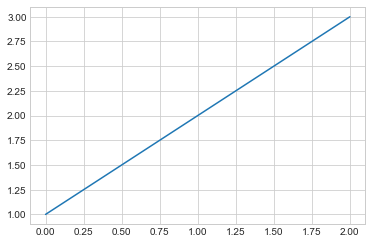

In [3]:
plt.plot([1,2,3])

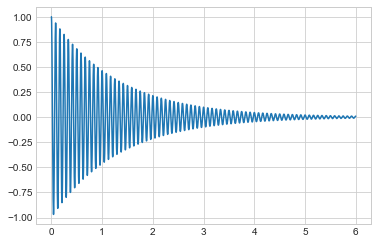

In [4]:
bins = np.linspace(0, 6, 4048)
omega = 1/12.
sig = np.exp(-bins/1.3) * np.cos(2*np.pi*bins/omega)
plt.plot(bins, sig)

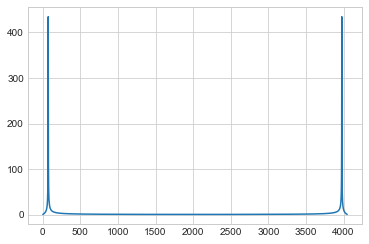

In [5]:
spec = np.abs(np.fft.fft(sig))
plt.plot(spec)

c:\users\tillsten\anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


(0, 5000)

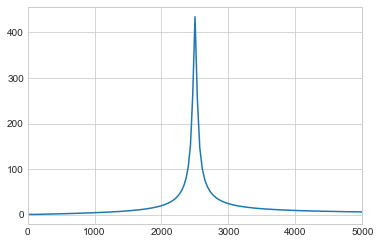

In [6]:
dt = np.diff(bins)[0]
freqs = np.fft.fftfreq(spec.size, d=dt)
plt.plot(3e4/freqs, spec)
plt.xlim(0, 5000)

In [7]:
1/12.

0.08333333333333333

In [8]:
1e7/4600

2173.913043478261

In [9]:
a = np.arange(11, dtype='float')
print(a)
np.digitize(np.array([1.5, 1.1, 9.1]), a)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


array([ 2,  2, 10], dtype=int64)

In [10]:
import attr

In [11]:
np.linspace(0,1, 3+1), np.linspace(0,1, 6+1)[1::2]

(array([ 0.        ,  0.33333333,  0.66666667,  1.        ]),
 array([ 0.16666667,  0.5       ,  0.83333333]))

In [12]:
speed_of_light = 299792458.

def mm_to_fs(mm):
    t = (mm * 0.001 / speed_of_light)* 1e15
    return t

In [13]:
mm_to_fs(300)/1e6

1.0006922855944562

In [14]:
def fs_to_mm(t_fs):
    dist = t_fs * 1e-15 * speed_of_light * 1000
    return dist
fs_to_mm(1e6)

299.79245800000007

0 -2 -1
2 0 -1
0 2 1
-2 0 1
0 -2 -1
2 0 -1
0 2 1
-2 0 1
0 -2 -1
2 0 -1
0 2 1
-2 0 1
0 -2 -1
2 0 -1
0 2 1
-2 0 1


-8

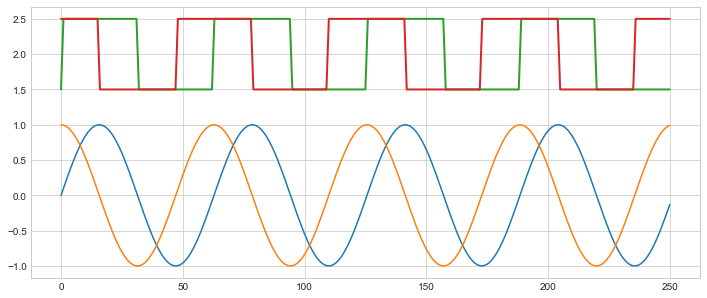

In [15]:
plt.figure(figsize=(12, 5))
x = np.arange(0,251.)
a = np.sin(x/10)
b = np.sin(x/10+np.pi/2.)
plt.plot(x, a)
plt.plot(x, b)

da = np.int64(a > 0.)*2-1
db = np.int64(b > 0.)*2-1
plt.plot(x, .5*da+2, lw=2)
plt.plot(x, .5*db+2, lw=2)

def count_change(a, b):
    count = 0
    for i in range(1, a.size):
        da = a[i] - a[i-1]
        db = b[i] - b[i-1]
        
        if da == 0 and db == 0:
            continue
        print(da, db, b[i])
        count += (da//2 * b[i])
    return count
count_change(da[::-1], db[::-1])

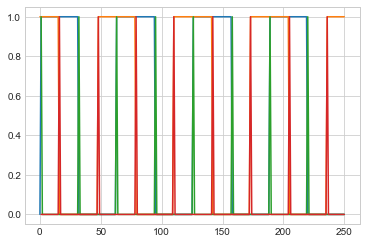

In [16]:
pos = 0
da = a > 0.
db = b > 0.
plt.plot(x, da)
plt.plot(x, db)

change_a = np.diff(da)
change_b = np.diff(db)

plt.plot(x[1:], change_a)
plt.plot(x[1:], change_b)

In [17]:
0.000000638*2000/2.

0.000638

In [18]:
1 % 0

ZeroDivisionError: integer division or modulo by zero

In [19]:
mm_to_fs(4)

13342.563807926083

In [228]:
a = np.loadtxt('bla_5.txt')
a.shape

(6000, 35)

(0, 30)

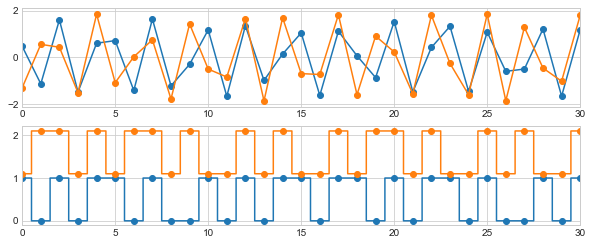

In [229]:
plt.figure(figsize=(10,4))
pd1, pd2, pyro = a[:, -3:].T
pd1 -= pd1.mean()
pd2 -= pd2.mean()
ax1 =plt.subplot(211)
plt.plot(pd1, 'o-')
plt.plot(pd2, 'o-')
plt.subplot(212, sharex=ax1)
plt.plot(pd1>0, 'o-', drawstyle='steps-mid')
plt.plot((pd2>0)+1.1, 'o-', drawstyle='steps-mid')

plt.xlim(0, 30)

0.499186354667 1.66651367861


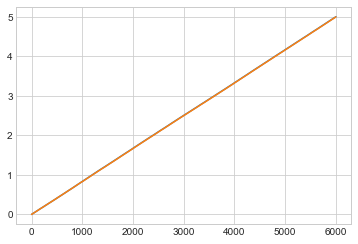

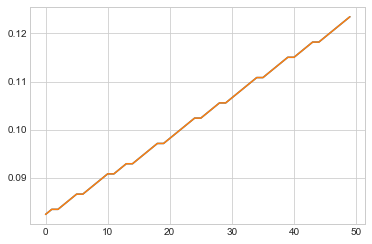

In [230]:
da = np.int64(pd1 >0)*2-1
db = np.int64(pd2 >0)*2-1
#plt.plot( .5*da+2, lw=2)
#plt.plot( .5*db+2, lw=2)
out = np.zeros(pd1.size)
def count_change(a, b):
    count = 0
    for i in range(1, a.size):
        da = a[i] - a[i-1]
        db = b[i] - b[i-1]
        #if da == db:
        #    count += 2*da
        #print(da, db, b[i])
        #else:
        #    count += (da//2 * b[i])
        if da != 0:
            count += 1
        out[i] = count
    return out*632.816e-9/2/speed_of_light/1e-12
x1 = count_change(da, db)
plt.plot(x1)
x2 = count_change(db, da)
plt.plot(x2)

print(fs_to_mm(x2.max()/3.*1000), x1.max()/3.)
plt.figure()
plt.plot(x2[100:150])
plt.plot(x2[100:150])

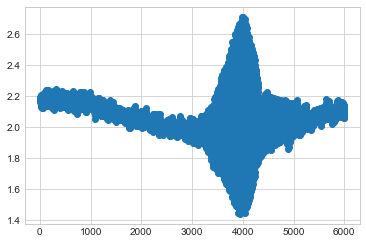

In [252]:
ix = np.argsort(x2)
plt.plot(pyro[ix], 'o-')

#plt.xlim(3.050,3.280)

(0,) 1


ValueError: all the input array dimensions except for the concatenation axis must match exactly

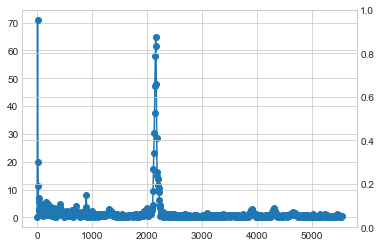

In [255]:
bin_widths = 0.003
bin_borders = np.arange(-0.00001, x2.max(), bin_widths)
ix = np.searchsorted(bin_borders, x2, side='left')
bins = np.zeros(bin_borders.size+1)
counts = np.zeros_like(bins)
np.add.at(counts, ix, 1)
np.add.at(bins, ix, pyro)
bins = bins[1:-1]

counts = counts[1:-1]
m = bins/counts
m -= m.mean()
out = []
plt.figure()

ax = plt.subplot(111)
tw = plt.twinx()
k0 = range(-20, 20, 1)
for i in k0:
    mn = np.roll(m, -np.argmax(m)+i)
#plt.plot(counts)
#plt.figure()
#plt.plot(bin_borders[1:],m, 'o-')
#plt.xlim(3.2, 3.55)

#plt.figure()
    sl = slice(m.size//2-1)
    fr= np.fft.fftfreq(m.size, d=bin_widths*1e-12)
    wn = (fr[sl]/speed_of_light)/1e2
    mf = np.fft.fft(mn)[sl]
    ax.plot(wn,np.abs(mf), 'o-')
    #plt.twinx()
    r = np.argmax(np.abs(mf))    
    ph = np.unwrap(np.angle(mf))
    #ph -= ph[np.argmax(np.abs(mf))]
    #ph = np.angle(mf)
    #tw.plot(wn[sl], ph, '-s', c='r')
    si = 3
    print(wn[r-si:r+si].shape, r)
    
    A = np.vstack([wn[sl][r-si:r+si], np.ones(2*si)]).T
    out.append(np.linalg.lstsq(A, ph[r-si:r+si])[0])
    
    plt.xlim(2100, 2250)
out = np.array(out)
out = abs(out)
print(k0[out.T[0].argmin()],out.T[1][out.T[0].argmin()]%(np.pi))
plt.figure()
plt.plot(k0, out.T[0])
    #ph -= np.argmax()

#plt.ylim(-1, 1)
#plt.ylim(300, 400)


In [208]:
%%timeit
out = []
wn = -(fr/speed_of_light)/1e2
mf = np.fft.fft(m)[sl]

    #plt.twinx()
r = np.argmax(np.abs(mf))
    #ph = np.unwrap(np.angle(mf))

    #ph -= ph[np.argmax(np.abs(mf))]
ph = np.angle(mf)

si = 2
A = np.vstack([wn[sl][r-si:r+si], np.ones(2*si)]).T
out.append(np.linalg.lstsq(A, ph[r-si:r+si])[0])

1000 loops, best of 3: 614 µs per loop


In [ ]:
plt.hist(pd2, 150)

In [ ]:
0.0005

In [ ]:
db

In [ ]:
(0.0005*3)/speed_of_light/1e-12

In [ ]:
x2.max()